# Levantamento de Dados Agr√≠colas no Brasil

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

üìå**Segundo o artigo:**  

<p>Normalization: Each attribute was
normalized to a range of 0‚Äì1 using the MinMaxScaler method from
scikit-learn. Normalization is a crucial step in preprocessing as it ensures
that all attributes have similar weights in the machine learning models,
preventing attributes with larger ranges from dominating the analysis.
By scaling all variables to the same range, we ensure that the model
treats each attribute equally, thus improving the overall performance
and interpretability of the results. The primary variable we aimed at
predicted was the deforestation rate (measured in km2).</p>

<p>Normaliza√ß√£o: Cada atributo foi
normalizado para um intervalo de 0‚Äì1 usando o m√©todo MinMaxScaler de
scikit-aprender. A normaliza√ß√£o √© uma etapa crucial no pr√©-processamento, pois garante
que todos os atributos t√™m pesos semelhantes nos modelos de aprendizado de m√°quina,
evitando que atributos com intervalos maiores dominem a an√°lise.
Ao dimensionar todas as vari√°veis ‚Äã‚Äãpara o mesmo intervalo, garantimos que o modelo
trata cada atributo igualmente, melhorando assim o desempenho geral
e interpretabilidade dos resultados. A principal vari√°vel que almejamos
previsto foi a taxa de desmatamento (medida em km2).</p>

## 1. Popula√ß√£o üë•

## 2. Produ√ß√£o de Milho üåΩ

### Carregamento do Dataset üìå üåΩ

In [27]:
df_milho = pd.read_excel("Producao-Milhos/Produ√ß√£o - milho(R$).xls")
df_milho.head(5)

Sigla  Codigo    Estado           1999           2000           2001  \
0    AC      12      Acre   18904.944259   24988.623815   20954.800824   
1    AL      27   Alagoas   10014.796780   17410.158922   13512.363104   
2    AM      13  Amazonas   12572.435225   12887.722412    9962.186814   
3    AP      16     Amap√°     663.587846     679.718502    1040.856621   
4    BA      29     Bahia  375105.438329  501726.823716  399834.954285   

            2002           2003           2004           2005  ...  \
0   29299.779272   35786.634134   26947.290855   27006.472107  ...   
1   36330.738430    7552.957958   16491.655465   17100.023457  ...   
2   10032.557501   12040.440695   11903.600267   18459.337233  ...   
3    1229.135524     602.771336     647.489097     903.332329  ...   
4  638859.811464  708056.506271  711164.008933  583660.566800  ...   

            2011           2012           2013           2014           2015  \
0   38268.591893   47024.320828   52944.780696   44083.775580   39699.818002   
1   15097.131217     776.582942    3381.146776    4173.057538    7536.855013   
2   20775.750071   21562.150384   17517.522557   16321.914633   12750.932234   
3    1487.279300    1152.900667     791.586128     750.958560     680.991540   
4  745510.058300  719756.399612  701582.387122  831413.663386  793235.816620   

            2016           2017           2018           2019          2020  
0   36829.169319   37864.276573   33140.497163   30894.373353  3.755522e+04  
1    8125.826024   11220.132765    9889.093433   17008.340016  3.381848e+04  
2    6198.567107    5769.165124    3934.672753    3177.369852  3.391611e+03  
3     590.611603     594.784525     426.905259     459.047068  5.124092e+02  
4  702204.208474  526824.273705  672710.163159  586494.715801  1.130002e+06  

[5 rows x 25 columns]

### Vizualizar pot√™ncias tratamentos no Dataset üìå üåΩ

In [28]:
df_milho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sigla   27 non-null     object 
 1   Codigo  27 non-null     int64  
 2   Estado  27 non-null     object 
 3   1999    27 non-null     float64
 4   2000    27 non-null     float64
 5   2001    27 non-null     float64
 6   2002    27 non-null     float64
 7   2003    27 non-null     float64
 8   2004    27 non-null     float64
 9   2005    27 non-null     float64
 10  2006    27 non-null     float64
 11  2007    27 non-null     float64
 12  2008    27 non-null     float64
 13  2009    27 non-null     float64
 14  2010    27 non-null     float64
 15  2011    27 non-null     float64
 16  2012    27 non-null     float64
 17  2013    27 non-null     float64
 18  2014    27 non-null     float64
 19  2015    27 non-null     float64
 20  2016    27 non-null     float64
 21  2017    27 non-null     float64
 22  2018

In [29]:
print(df_milho.dtypes)  # Verificar os tipos das colunas

Sigla      object
Codigo      int64
Estado     object
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object


### Filtragem dos estadosüìå üåΩ

In [30]:
# Lista dos estados que queremos manter
estados_desejados = [
    "Acre", "Roraima", "Rond√¥nia", "Amazonas", "Amap√°",
    "Mato Grosso", "Par√°", "Tocantins", "Maranh√£o"
]

# Filtrar apenas os estados desejados
df_milho_estado_filtrado = df_milho[df_milho["Estado"].isin(estados_desejados)].copy()
df_milho_estado_filtrado = df_milho_estado_filtrado.set_index("Estado")  # Definir √≠ndice como nome do estado


In [31]:
df_milho_filtrado = df_milho_estado_filtrado.reset_index()
print(df_milho_filtrado["Estado"].head(len(estados_desejados)))

0           Acre
1       Amazonas
2          Amap√°
3       Maranh√£o
4    Mato Grosso
5           Par√°
6       Rond√¥nia
7        Roraima
8      Tocantins
Name: Estado, dtype: object


### Prepara√ß√£o dos dados para o gr√°fico üìå üåΩ

In [32]:
# Selecionar as colunas dos anos
# 0(Sigla) 1(C√≥digo) 2(Estado) 3(1999)
colunas_anos_milho = df_milho_filtrado.columns[4:] 
print(colunas_anos_milho)


Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [33]:
# Armazenar as Siglas e os Estados em vari√°veis separadas
siglas_milho = df_milho_filtrado["Sigla"]
estados_milho = df_milho_filtrado["Estado"]
# Exibir Siglas e Estados lado a lado com tabula√ß√£o
for sigla, estado in zip(siglas_milho, estados_milho):
    print(sigla, "\t", estado)


AC 	 Acre
AM 	 Amazonas
AP 	 Amap√°
MA 	 Maranh√£o
MT 	 Mato Grosso
PA 	 Par√°
RO 	 Rond√¥nia
RR 	 Roraima
TO 	 Tocantins


### Processo de Plota√ß√£o do Gr√°fico üìå üåΩ

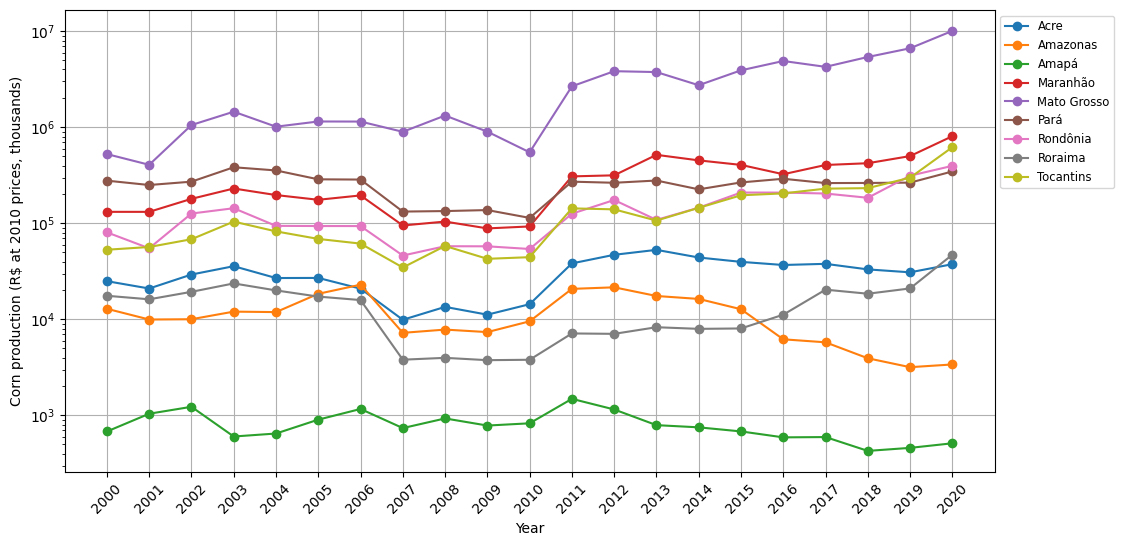

In [34]:

plt.figure(figsize=(12, 6))

# Iterar sobre os estados e siglas para plotar os dados corretamente
for sigla, estado in zip(siglas_milho, estados_milho):
    plt.plot(colunas_anos_milho, df_milho_filtrado[df_milho_filtrado["Sigla"] == sigla].iloc[:, 4:].values.flatten(), 
             marker='o', label=estado)

plt.xlabel("Year")
plt.ylabel("Corn production (R$ at 2010 prices, thousands)")
plt.xticks(colunas_anos_milho, rotation=45)
plt.yscale("log")  # Escala logar√≠tmica
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize="small")
plt.grid(True)

plt.show()


## 3. √Årea plantada ou colhida (hectares) üå±

‚û°Ô∏è**Resumo:** 

<p>√Årea plantada: A extens√£o total das terras onde foram feitas planta√ß√µes em um determinado per√≠odo.</p>
<p>√Årea colhida: A extens√£o total das terras onde as colheitas foram efetivamente realizadas (pode ser menor que a √°rea plantada devido a perdas).</p>


‚û°Ô∏è**Segundo o artigo:**  

<p> A √°rea plantada ou colhida foi identificada como uma das vari√°veis mais importantes para prever o desmatamento, especialmente em modelos baseados em √°rvores de decis√£o, como Random Forest, Gradient Boosting, Decision Tree e Extra Trees.</p>

<p>A an√°lise de import√¢ncia das vari√°veis (feature importance) mostrou que a √°rea de cultivos permanentes e a √°rea de cultivos tempor√°rios est√£o entre os principais fatores que influenciam o desmatamento.</p>

<p></p>


### Carregamento do Dataset üìåüå±

In [142]:
df_area_plantada_colhida = pd.read_excel("√Årea Plantada ou Colhida (hectares)/√Årea plantada ou destinada √† colheita - total.xls")
df_milho.head(11)

Sigla  Codigo            Estado     1999     2000     2001     2002  \
0     AC      12              Acre    91787   105167   102604   113139   
1     AL      27           Alagoas   703112   713725   707909   685171   
2     AM      13          Amazonas   213964   209183   197059   203935   
3     AP      16             Amap√°     8235    10025    14856    14407   
4     BA      29             Bahia  3920625  4175399  4059643  4316615   
5     CE      23             Cear√°  1836602  1930621  1805994  1958333   
6     DF      53  Distrito Federal    80475    84690    85252    89818   
7     ES      32    Esp√≠rito Santo   742936   746387   759385   784580   
8     GO      52             Goi√°s  3059313  3092529  3152788  3500954   
9     MA      21          Maranh√£o  1180275  1244774  1286775  1327467   
10    MG      31      Minas Gerais  4074186  4065496  4059376  4191872   

       2003     2004     2005  ...     2011     2012     2013     2014  \
0    113362   132684   134582  ...   132201   146928   130776   123511   
1    594087   652276   651244  ...   599116   527082   578948   567446   
2    194653   181457   210503  ...   188120   188131   176155   137654   
3     13687    14667    16635  ...    25564    24688    28120    43172   
4   4392635  4671230  4833599  ...  4904232  4397344  4515117  4902220   
5   1965360  1895118  1744157  ...  2084945  1732234  1364914  1505816   
6    101584   113182   125313  ...   127644   134905   136665   175023   
7    799522   795406   789128  ...   694209   687664   675834   658030   
8   3749736  4307207  4325931  ...  4926515  5282270  5635281  6135462   
9   1445559  1553114  1640447  ...  1788327  1830190  1878533  2006386   
10  4449691  4813757  4822071  ...  4951412  5099200  5293965  5466054   

       2015     2016     2017     2018     2019     2020  
0    116587   107294   100543    85330    81903    81550  
1    461581   455548   521140   449703   490459   467252  
2    124636   123625   131242   123073   123121   123071  
3     34499    37651    42260    36828    37334    38679  
4   5032413  4574500  4075524  4127884  4122259  4136484  
5   1508414  1438053  1521932  1471602  1372558  1385916  
6    161011   166489   162894   165073   165445   171565  
7    652000   616289   584314   567298   558348   565084  
8   6125209  6345627  6436529  6351417  6676276  6941305  
9   1829731  1597851  1810133  1821742  1722710  1719056  
10  5427622  5534141  5296173  5351586  5627003  5833676  

[11 rows x 25 columns]

### Vizualizar pot√™ncias tratamentos no Dataset üìåüå±

In [165]:
df_area_plantada_colhida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sigla   27 non-null     object
 1   Codigo  27 non-null     int64 
 2   Estado  27 non-null     object
 3   1999    27 non-null     int64 
 4   2000    27 non-null     int64 
 5   2001    27 non-null     int64 
 6   2002    27 non-null     int64 
 7   2003    27 non-null     int64 
 8   2004    27 non-null     int64 
 9   2005    27 non-null     int64 
 10  2006    27 non-null     int64 
 11  2007    27 non-null     int64 
 12  2008    27 non-null     int64 
 13  2009    27 non-null     int64 
 14  2010    27 non-null     int64 
 15  2011    27 non-null     int64 
 16  2012    27 non-null     int64 
 17  2013    27 non-null     int64 
 18  2014    27 non-null     int64 
 19  2015    27 non-null     int64 
 20  2016    27 non-null     int64 
 21  2017    27 non-null     int64 
 22  2018    27 non-null     int6

In [176]:
print(df_area_plantada_colhida.dtypes)  # Verificar os tipos das colunas

Sigla     object
Codigo     int64
Estado    object
1999       int64
2000       int64
2001       int64
2002       int64
2003       int64
2004       int64
2005       int64
2006       int64
2007       int64
2008       int64
2009       int64
2010       int64
2011       int64
2012       int64
2013       int64
2014       int64
2015       int64
2016       int64
2017       int64
2018       int64
2019       int64
2020       int64
dtype: object


### Filtragem dos estadosüìåüå±

In [167]:
# Lista dos estados que queremos manter
estados_desejados = [
    "Acre", "Roraima", "Rond√¥nia", "Amazonas", "Amap√°",
    "Mato Grosso", "Par√°", "Tocantins", "Maranh√£o"
]

# Filtrar apenas os estados desejados
df_area_plantada_colhida_estado_filtrado = df_area_plantada_colhida[df_area_plantada_colhida["Estado"].isin(estados_desejados)].copy()
df_area_plantada_colhida_estado_filtrado = df_area_plantada_colhida_estado_filtrado.set_index("Estado")  # Definir √≠ndice como nome do estado

In [172]:
df_area_plantada_colhida_filtrado = df_area_plantada_colhida_estado_filtrado.reset_index()
print(df_area_plantada_colhida_filtrado["Estado"].head(len(estados_desejados)))

0           Acre
1       Amazonas
2          Amap√°
3       Maranh√£o
4    Mato Grosso
5           Par√°
6       Rond√¥nia
7        Roraima
8      Tocantins
Name: Estado, dtype: object


### Prepara√ß√£o dos dados para o gr√°fico üìåüå±

In [178]:
# Selecionar as colunas dos anos
# 0(Sigla) 1(C√≥digo) 2(Estado) 3(1999)
colunas_anos_area_plantada_colhida = df_area_plantada_colhida_filtrado.columns[4:] 
print(colunas_anos_area_plantada_colhida)


Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [174]:
# Armazenar as Siglas e os Estados em vari√°veis separadas
siglas_area_planta_colhida = df_area_plantada_colhida_filtrado["Sigla"]
estados_area_planta_colhida = df_area_plantada_colhida_filtrado["Estado"]
# Exibir Siglas e Estados lado a lado com tabula√ß√£o
for sigla, estado in zip(siglas_area_planta_colhida,estados_area_planta_colhida):
    print(sigla, "\t", estado)

AC 	 Acre
AM 	 Amazonas
AP 	 Amap√°
MA 	 Maranh√£o
MT 	 Mato Grosso
PA 	 Par√°
RO 	 Rond√¥nia
RR 	 Roraima
TO 	 Tocantins


### Processo de Plota√ß√£o do Gr√°fico üìåüå±

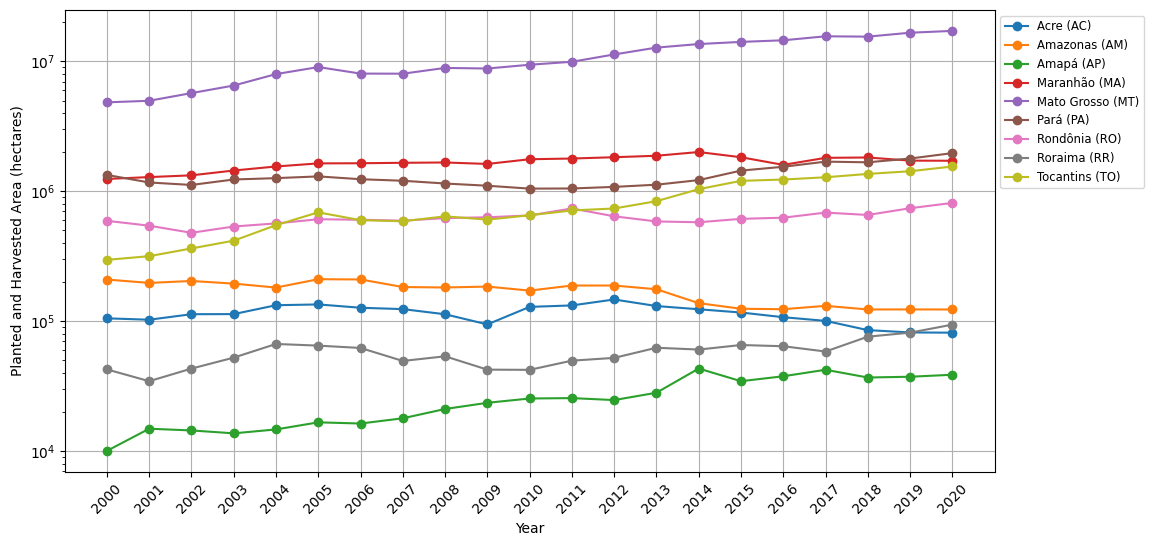

In [181]:
plt.figure(figsize=(12, 6))

# Iterar sobre os estados e siglas para plotar os dados corretamente
for sigla, estado in zip(siglas_area_planta_colhida, estados_area_planta_colhida):
    dados_estado = df_area_plantada_colhida_filtrado[df_area_plantada_colhida_filtrado["Sigla"] == sigla]
    
    if not dados_estado.empty:
        plt.plot(colunas_anos_area_plantada_colhida, dados_estado.iloc[0, 4:].values.flatten(), 
                 marker='o', label=f"{estado} ({sigla})")  # Melhorando a legenda

plt.xlabel("Year")
plt.ylabel("Planted and Harvested Area (hectares)")  # Atualizado para o correto
plt.xticks(colunas_anos_area_plantada_colhida, rotation=45)
plt.yscale("log")  # Escala logar√≠tmica
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)

plt.show()



# 4. Despesa Or√ßament√°ria üí∞

‚û°Ô∏è**Segundo o artigo:**  

## **Trecho 1:**

### **Texto Original:**
<p>"The analysis revealed that the harvested area of permanent crops is the most influential variable in predicting deforestation, followed by the area of temporary crops. Furthermore, our findings indicate a significant inverse relationship between public spending and deforestation rates."</p>

### **Texto Traduzido:**
<p>"A an√°lise revelou que a √°rea colhida de culturas permanentes √© a vari√°vel mais influente na previs√£o do desmatamento, seguida pela √°rea de culturas tempor√°rias. Al√©m disso, nossos achados indicam uma rela√ß√£o inversa significativa entre os gastos p√∫blicos e as taxas de desmatamento."</p>


## **Trecho 2:**


### **Texto Original:**
<p>"The SHAP analysis reveals that budget expenditure consistently has a negative SHAP value, indicating its role in reducing deforestation rates. Higher public spending on environmental management, law enforcement, and sustainable agricultural practices can mitigate deforestation."</p>

### **Texto Traduzido:**
<p>"A an√°lise SHAP revela que as despesas or√ßament√°rias consistentemente t√™m um valor SHAP negativo, indicando seu papel na redu√ß√£o das taxas de desmatamento. Maiores gastos p√∫blicos em gest√£o ambiental, fiscaliza√ß√£o e pr√°ticas agr√≠colas sustent√°veis podem mitigar o desmatamento."</p>


## **Trecho 3:**


### **Texto Original:**
<p>"The SHAP values for budget expenditure are negative, indicating that higher public spending is associated with lower deforestation rates. This finding underscores the importance of financial investment in conservation efforts."</p>

### **Texto Traduzido:**
<p>"Os valores SHAP para as despesas or√ßament√°rias s√£o negativos, indicando que maiores gastos p√∫blicos est√£o associados a menores taxas de desmatamento. Essa descoberta ressalta a import√¢ncia do investimento financeiro em esfor√ßos de conserva√ß√£o."</p>



## **Trecho 4:**

### **Texto Original:**
<p>"The SHAP analysis supports the findings from the feature importance analysis by providing a more detailed view of how each feature affects the predictions. The consistent patterns observed in SHAP values across different models reinforce the importance of the identified variables. For instance, the high SHAP values for permanent and temporary crops across all models confirm their critical role in driving deforestation. Similarly, the negative SHAP values for budget expenditure highlight the mitigating effect of financial investment on deforestation rates."</p>

### **Texto Traduzido:**
<p>"A an√°lise SHAP apoia os achados da an√°lise de import√¢ncia das vari√°veis, fornecendo uma vis√£o mais detalhada de como cada caracter√≠stica afeta as previs√µes. Os padr√µes consistentes observados nos valores SHAP em diferentes modelos refor√ßam a import√¢ncia das vari√°veis identificadas. Por exemplo, os altos valores SHAP para culturas permanentes e tempor√°rias em todos os modelos confirmam seu papel cr√≠tico no desmatamento. Da mesma forma, os valores SHAP negativos para as despesas or√ßament√°rias destacam o efeito mitigador do investimento financeiro nas taxas de desmatamento."</p>


## **Trecho 5:**


### **Texto Original:**
<p>"The substantial role of permanent crop area in our machine learning models is noteworthy, especially against the backdrop of its decline in most states analyzed, compared to the increase in temporary farming areas. Rivero et al. (2009) observed that soybeans, a major temporary crop, often replace other crops or livestock areas. This transition to soybean cultivation, particularly in areas already deforested, explains why temporary crops like soybeans have a relatively smaller impact on further deforestation. Our models also indicated that fire outbreaks had a minimal effect on deforestation, consistent with Jakimow et al. (2023), who found most fires occur in areas already cleared. Additionally, GDP and population were not significant factors in deforestation."</p>

### **Texto Traduzido:**
<p>"O papel substancial da √°rea de culturas permanentes em nossos modelos de aprendizado de m√°quina √© not√°vel, especialmente diante do decl√≠nio observado na maioria dos estados analisados, em compara√ß√£o com o aumento nas √°reas de culturas tempor√°rias. Rivero et al. (2009) observaram que a soja, uma cultura tempor√°ria importante, frequentemente substitui outras culturas ou √°reas de pecu√°ria. Essa transi√ß√£o para o cultivo de soja, particularmente em √°reas j√° desmatadas, explica por que culturas tempor√°rias como a soja t√™m um impacto relativamente menor no desmatamento adicional. Nossos modelos tamb√©m indicaram que os focos de inc√™ndio tiveram um efeito m√≠nimo no desmatamento, consistente com Jakimow et al. (2023), que descobriram que a maioria dos inc√™ndios ocorre em √°reas j√° desmatadas. Al√©m disso, o PIB e a popula√ß√£o n√£o foram fatores significativos no desmatamento."</p>

## **Trecho 6:**


### **Texto Original:**
<p>"The SHAP analysis provides additional insights into the impact of various features on deforestation. The negative influence of budget expenditure on deforestation rates shows the importance of financial investment in conservation and sustainable practices. This finding is critical for policymakers, as it suggests that increasing public spending on environmental management can effectively reduce deforestation. Conversely, the positive impact of both temporary and permanent crops on deforestation highlights the ongoing pressure of agricultural expansion on forested areas."</p>

### **Texto Traduzido:**
<p>"A an√°lise SHAP fornece insights adicionais sobre o impacto de v√°rias caracter√≠sticas no desmatamento. A influ√™ncia negativa das despesas or√ßament√°rias nas taxas de desmatamento mostra a import√¢ncia do investimento financeiro em conserva√ß√£o e pr√°ticas sustent√°veis. Essa descoberta √© crucial para os formuladores de pol√≠ticas, pois sugere que o aumento dos gastos p√∫blicos em gest√£o ambiental pode reduzir efetivamente o desmatamento. Por outro lado, o impacto positivo de culturas tempor√°rias e permanentes no desmatamento destaca a press√£o cont√≠nua da expans√£o agr√≠cola sobre √°reas florestadas."</p>




### Carregamento do Dataset üìåüí∞

In [ ]:
#Obs: n√£o √© o mesmo dado do lab
df_despesas = pd.read_excel("Despesa Or√ßament√°ria (R$)/Despesa por fun√ß√£o - gest√£o ambiental, agricultura e organiza√ß√£o agr√°ria - empenhada - estadual.xls")
df_despesas.head(5)

Sigla  Codigo    Estado          1999          2000          2001  \
0    AC      12      Acre  1.648035e+07  2.883258e+07  2.341070e+07   
1    AL      27   Alagoas  1.806905e+07  1.921092e+07  2.271804e+07   
2    AM      13  Amazonas  1.768597e+07  0.000000e+00  7.891870e+06   
3    AP      16     Amap√°  2.869222e+06  5.433628e+06  9.538735e+06   
4    BA      29     Bahia  1.418427e+08  2.046999e+08  1.976951e+08   

           2002          2003          2004          2005  ...          2011  \
0  4.105204e+07  3.807467e+07  4.485788e+07  5.208983e+07  ...  1.327949e+08   
1  9.689207e+07  5.027892e+07  4.136179e+07  5.471594e+07  ...  8.321811e+07   
2  4.453358e+07  5.579549e+07  8.833143e+07  1.130113e+08  ...  1.673709e+08   
3  1.332816e+07  1.462761e+07  1.524754e+07  1.812019e+07  ...  2.434730e+07   
4  2.739799e+08  3.525604e+08  4.334416e+08  4.105308e+08  ...  6.051689e+08   

           2012          2013          2014          2015          2016  \
0  1.888470e+08  1.684722e+08  1.827975e+08  1.655324e+08  1.560863e+08   
1  1.047100e+08  1.510090e+08  1.542988e+08  1.426337e+08  3.025895e+08   
2  2.319340e+08  2.947667e+08  3.239618e+08  1.861335e+08  2.129446e+08   
3  2.771443e+07  4.638822e+07  3.698461e+07  2.632406e+07  1.512032e+07   
4  6.882287e+08  6.876168e+08  7.325790e+08  5.410978e+08  6.310006e+08   

           2017          2018          2019          2020  
0  1.645238e+08  1.697231e+08  1.335434e+08  1.553372e+08  
1  2.941206e+08  3.245115e+08  1.999142e+08  2.168730e+08  
2  1.956323e+08  2.877255e+08  1.941365e+08  1.750441e+08  
3  1.808358e+07  2.133502e+07  1.206510e+07  1.410630e+07  
4  6.554564e+08  7.857675e+08  6.650887e+08  7.342562e+08  

[5 rows x 25 columns]

### Vizualizar pot√™ncias tratamentos no Dataset üìåüí∞

In [17]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sigla   27 non-null     object 
 1   Codigo  27 non-null     int64  
 2   Estado  27 non-null     object 
 3   1999    27 non-null     float64
 4   2000    27 non-null     float64
 5   2001    27 non-null     float64
 6   2002    27 non-null     float64
 7   2003    27 non-null     float64
 8   2004    27 non-null     float64
 9   2005    27 non-null     float64
 10  2006    27 non-null     float64
 11  2007    27 non-null     float64
 12  2008    27 non-null     float64
 13  2009    27 non-null     float64
 14  2010    27 non-null     float64
 15  2011    27 non-null     float64
 16  2012    27 non-null     float64
 17  2013    27 non-null     float64
 18  2014    27 non-null     float64
 19  2015    27 non-null     float64
 20  2016    27 non-null     float64
 21  2017    27 non-null     float64
 22  2018

In [18]:
print(df_despesas.dtypes)  # Verificar os tipos das colunas

Sigla      object
Codigo      int64
Estado     object
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object


### Filtragem dos estadosüìåüí∞

In [19]:
# Lista dos estados que queremos manter
estados_desejados = [
    "Acre", "Roraima", "Rond√¥nia", "Amazonas", "Amap√°",
    "Mato Grosso", "Par√°", "Tocantins", "Maranh√£o"
]

# Filtrar apenas os estados desejados
df_despesas_estado_filtrado = df_despesas[df_despesas["Estado"].isin(estados_desejados)].copy()
df_despesas_estado_filtrado = df_despesas_estado_filtrado.set_index("Estado")  # Definir √≠ndice como nome do estado

# Visualizar os primeiros dados filtrados
print(df_despesas_estado_filtrado.head())


            Sigla  Codigo         1999         2000         2001         2002  \
Estado                                                                          
Acre           AC      12  16480351.00  28832578.47  23410698.78  41052040.32   
Amazonas       AM      13  17685970.41         0.00   7891870.00  44533581.11   
Amap√°          AP      16   2869221.75   5433627.80   9538735.27  13328156.60   
Maranh√£o       MA      21  15239850.98   7073867.98   4960227.22  29199437.98   
Mato Grosso    MT      51  43232165.00  52652879.67  40140417.28  89468498.00   

                    2003         2004          2005          2006  ...  \
Estado                                                             ...   
Acre         38074672.00  44857879.48  5.208983e+07  6.572244e+07  ...   
Amazonas     55795494.58  88331432.65  1.130113e+08  1.092601e+08  ...   
Amap√°        14627607.31  15247535.25  1.812019e+07  2.084534e+07  ...   
Maranh√£o     37711437.24  22579248.80  2.898953e+07  5.055

In [20]:
df_despesas_filtrado = df_despesas_estado_filtrado.reset_index()
print(df_despesas_filtrado["Estado"].head(len(estados_desejados)))


0           Acre
1       Amazonas
2          Amap√°
3       Maranh√£o
4    Mato Grosso
5           Par√°
6       Rond√¥nia
7        Roraima
8      Tocantins
Name: Estado, dtype: object



### Prepara√ß√£o dos dados para o gr√°fico üìå üí∞


In [21]:
# Selecionar as colunas dos anos
# 0(Sigla) 1(C√≥digo) 2(Estado) 3(1999)
colunas_anos_despesas = df_despesas_filtrado.columns[4:] 
print(colunas_anos_despesas)

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [25]:

# Armazenar as Siglas e os Estados em vari√°veis separadas
siglas_despesas = df_despesas_filtrado["Sigla"]
estados_despesas = df_despesas_filtrado["Estado"]
# Exibir Siglas e Estados lado a lado com tabula√ß√£o
for sigla, estado in zip(siglas_despesas, estados_despesas):
    print(sigla, "\t", estado)


AC 	 Acre
AM 	 Amazonas
AP 	 Amap√°
MA 	 Maranh√£o
MT 	 Mato Grosso
PA 	 Par√°
RO 	 Rond√¥nia
RR 	 Roraima
TO 	 Tocantins


### Processo de Plota√ß√£o do Gr√°fico üìå üí∞

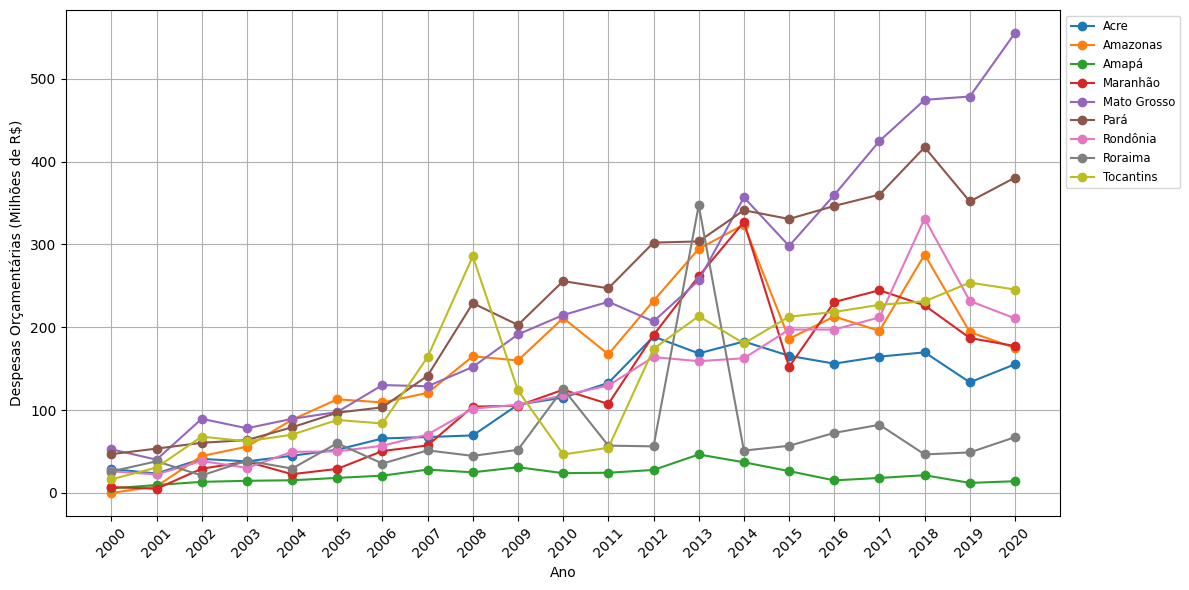

In [24]:
import matplotlib.pyplot as plt

# Configura√ß√£o do tamanho da figura
plt.figure(figsize=(12, 6))

# Iterar sobre os estados e siglas para plotar os dados corretamente
for sigla, estado in zip(siglas_despesas, estados_despesas):
    # Extrair os valores das despesas or√ßament√°rias (em milh√µes de R$)
    despesas = df_despesas_filtrado[df_despesas_filtrado["Sigla"] == sigla].iloc[:, 4:].values.flatten() / 1_000_000  # Convertendo para milh√µes de R$
    plt.plot(colunas_anos_despesas, despesas, marker='o', label=estado)

# Configura√ß√µes do gr√°fico
plt.xlabel("Ano")
plt.ylabel("Despesas Or√ßament√°rias (Milh√µes de R$)")
plt.xticks(colunas_anos_despesas, rotation=45)  # Rotacionar os r√≥tulos do eixo X para melhor visualiza√ß√£o
plt.yscale("linear")  # Escala linear (n√£o logar√≠tmica, pois estamos trabalhando com valores monet√°rios)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")  # Legenda fora do gr√°fico
plt.grid(True)  # Adicionar grade ao gr√°fico

# Exibir o gr√°fico
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()